<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Dataset
In this example the moons dataset is used to build a binary classifcator. The aim is to find the boundary beetween two cresecent moons. The entire data set consists of 1500 data points and is shown in the image below. 

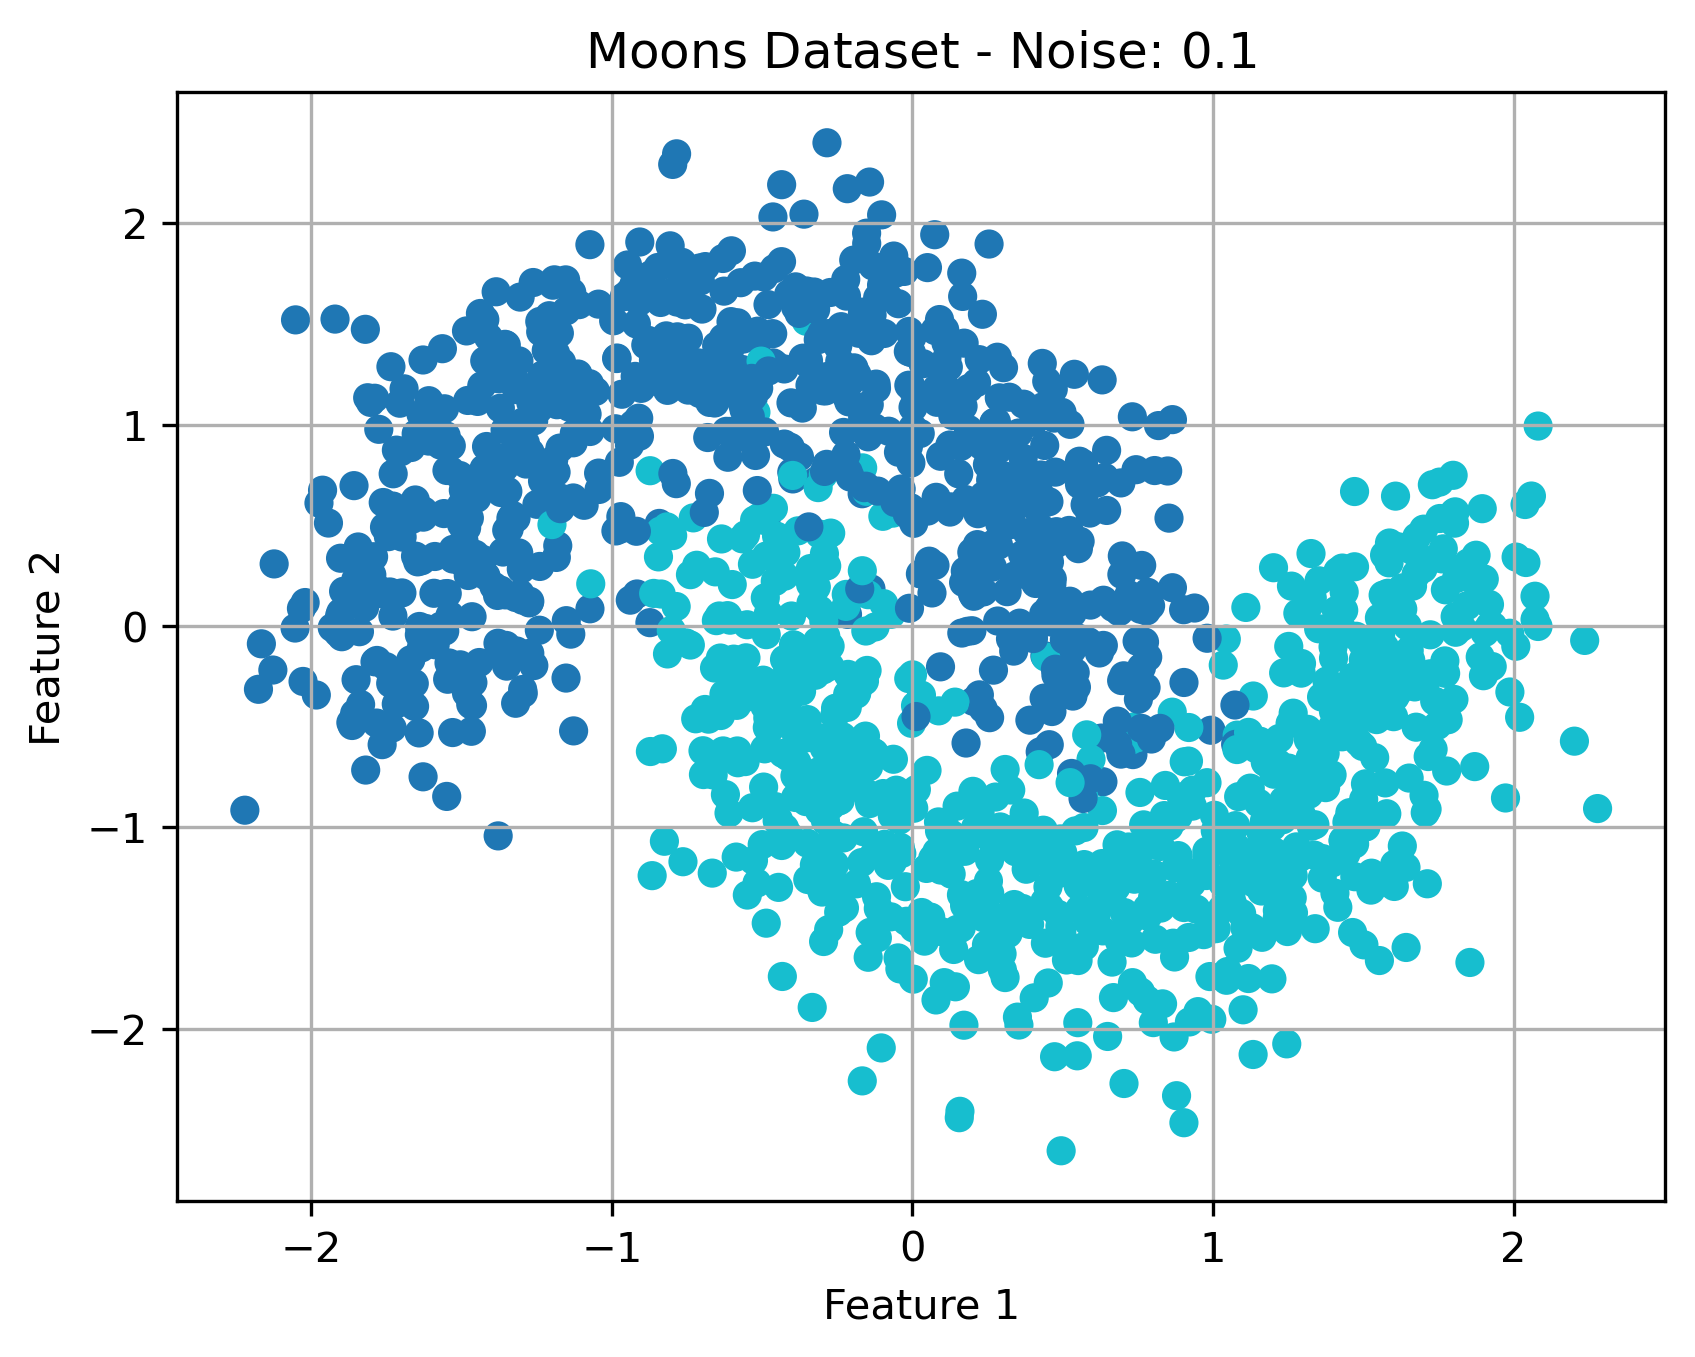

In [ ]:
# | echo: false
#%matplotlib widget
X = StandardScaler().fit_transform(X)
# X = transform(X, alpha=np.pi / 8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10")
plt.title("Moons Dataset - Noise: $0.1$")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## MLMVN

In [ ]:
PATH = str(Path.cwd() / "models/moons-mlmvn.pt")

In [ ]:
def backward_hook(module, grad_input, grad_output):
    print("module:", module)
    print("grad_input:", grad_input)
    print("grad_output:", grad_output)


model_dict: dict = {}


def fc_hook(layer_name, module, grad_input, grad_output):
    if layer_name in model_dict:
        model_dict[layer_name]["weights"].append(module.weights.detach().clone())
        model_dict[layer_name]["bias"].append(module.bias.detach().clone())
        model_dict[layer_name]["grad_input"].append(grad_input)
        model_dict[layer_name]["grad_output"].append(grad_output)
    else:
        model_dict[layer_name] = {}
        model_dict[layer_name]["weights"] = []
        model_dict[layer_name]["weights"].append(module.weights.detach().clone())
        model_dict[layer_name]["bias"] = []
        model_dict[layer_name]["bias"].append(module.bias.detach().clone())
        model_dict[layer_name]["grad_input"] = []
        model_dict[layer_name]["grad_input"].append(grad_input)
        model_dict[layer_name]["grad_output"] = []
        model_dict[layer_name]["grad_output"].append(grad_output)


class Model(nn.Module):
    def __init__(self, categories, periodicity):
        super().__init__()
        self.categories = categories
        self.periodicity = periodicity
        self.first_linear = FirstLayer(2, 5)
        self.phase_act1 = cmplx_phase_activation()
        # self.hidden_linear = HiddenLayer(4, 4)
        # self.phase_act2 = cmplx_phase_activation()
        self.output_linear = OutputLayer(5, 1)
        self.phase_act3 = cmplx_phase_activation()

    def forward(self, x):
        x = self.first_linear(x)
        x = self.phase_act1(x)
        # x = self.hidden_linear(x)
        # x = self.phase_act2(x)
        x = self.output_linear(x)
        x = self.phase_act3(x)
        return x

    def first_layer_backward_hook(self, module, grad_input, grad_output):
        fc_hook("first_layer", module, grad_input, grad_output)

    def hidden_layer_backward_hook(self, module, grad_input, grad_output):
        fc_hook("hidden_layer", module, grad_input, grad_output)

    def output_layer_backward_hook(self, module, grad_input, grad_output):
        fc_hook("output_layer", module, grad_input, grad_output)

    def predict(self, x):
        """
        Performs the prediction task of the network

        Args:
          x: torch.Tensor
            Input tensor of size ([3])

        Returns:
          Most likely class i.e., Label with the highest score
        """
        # Pass the data through the networks
        output = self.forward(x)

        # # Choose the label with the highest score
        # return torch.argmax(output, 1)
        return output

    def initialize_weights(self, initilizer="uniform"):
        if initilizer == "uniform":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_uniform_independent_(m.weights, -0.5, 0.5)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_uniform_independent_(m.weights, -0.5, 0.5)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_uniform_independent_(m.weights, -0.5, 0.5)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "normal":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_normal_independent_(
                        m.weights,
                    )
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_normal_independent_(
                        m.weights,
                    )
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_normal_independent_(
                        m.weights,
                    )
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "ones":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.ones_(m.weights, imag_zero=True)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.ones_(m.weights, imag_zero=True)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.ones_(m.weights, imag_zero=True)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "zeros":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.zeros_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.zeros_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.zeros_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "kaiming_normal":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_kaiming_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_kaiming_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_kaiming_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "kaiming_uniform":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_kaiming_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_kaiming_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_kaiming_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "xavier_normal":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_xavier_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_xavier_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_xavier_normal_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "xavier_uniform":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_xavier_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_xavier_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_xavier_uniform_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_standard_glorot":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_independent_glorot":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights)
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_standard_xavier":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_independent_xavier":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="xavier")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_standard_kaiming":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_independent_kaiming":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="kaiming")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_standard_he":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_standard_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "trabelsi_independent_he":
            for m in self.modules():
                if isinstance(m, FirstLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, HiddenLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, OutputLayer):
                    cmplx_init.cplx_trabelsi_independent_(m.weights, kind="he")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
        elif initilizer == "standard":
            pass


def fit(model, X, y, epochs, batch_size, optimizer, criterion, categories, periodicity):
    # List of losses for visualization
    losses = []
    scores = []
    acc_best = 0

    for i in range(epochs):
        # Pass the data through the network and compute the loss
        # We'll use the whole dataset during the training instead of using batches
        # in to order to keep the code simple for now.

        batch_loss = []

        for j in range((X.shape[0] - 1) // batch_size + 1):
            start_j = j * batch_size
            end_j = start_j + batch_size
            xb = X[start_j:end_j]
            yb = y[start_j:end_j]

            y_pred = model(xb)
            loss = criterion(y_pred, yb, categories, periodicity)
            batch_loss.append((torch.abs(loss)).detach().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step(inputs=xb, layers=list(model.children()))

        losses.append(sum(batch_loss) / len(batch_loss))
        y_pred = model(X)
        y_pred = angle2class(y_pred, categories, periodicity)
        scores.append(accuracy(y_pred.squeeze(), y))

        Logger.current_logger().report_scalar(
            "Loss/Acc", "Loss", iteration=i, value=losses[-1]
        )
        writer.add_scalar("Loss", losses[-1], i)
        Logger.current_logger().report_scalar(
            "Loss/Acc", "Acc", iteration=i, value=scores[-1]
        )
        writer.add_scalar("Accuracy", scores[-1], i)

        for key in model_dict:
            for key_layer in model_dict[key]:
                if key_layer in ["weights", "bias"]:
                    log_label = str(key) + "_" + str(key_layer)
                    log_label.replace(" ", "")
                    writer.add_histogram(
                        log_label + "_real", model_dict[key][key_layer].real, i
                    )
                    writer.add_histogram(
                        log_label + "_imag", model_dict[key][key_layer].imag, i
                    )
                    writer.add_histogram(
                        log_label + "_mag", torch.abs(model_dict[key][key_layer]), i
                    )
                    writer.add_histogram(
                        log_label + "_angle", torch.angle(model_dict[key][key_layer]), i
                    )

        # writer.add_histogram("distribution centers", x + n_iter, i)
        if scores[-1] > acc_best:
            acc_best = scores[-1]
            torch.save(model.state_dict(), PATH)

    writer.close()
    return losses, scores

In [ ]:
initilizers = [
    "uniform",
    "normal",
    # "zeros",
    # "ones",
    "kaiming_normal",
    "kaiming_uniform",
    "xavier_normal",
    "xavier_uniform",
    "trabelsi_standard_xavier",
    "trabelsi_independent_xavier",
    "trabelsi_standard_kaiming",
    "trabelsi_independent_kaiming",
    "standard",
]

In [ ]:
for initilizer in initilizers:
    model = Model(categories=categories, periodicity=periodicity)
    model.initialize_weights(initilizer=initilizer)
    criterion = ComplexMSELoss.apply
    optimizer = ECL(model.parameters(), lr=lr)

    task = Task.init(
        project_name="mlmvn",
        task_name="moons-mlmvn-[2-5-1]",
        tags=["mlmvn", "moons", "initilizer"],
    )
    writer = SummaryWriter()

    #  capture a dictionary of hyperparameters with config
    config_dict = {
        "learning_rate": lr,
        "epochs": epochs,
        "batch_size": batch_size,
        "optim": "ECL",
        "categories": categories,
        "periodicity": periodicity,
        "layer": "[2-5-1]",
        "initilizer": initilizer,
    }
    task.connect(config_dict)

    losses, scores = fit(
        model,
        X_train_t,
        y_train_t,
        epochs=epochs,
        batch_size=batch_size,
        optimizer=optimizer,
        criterion=criterion,
        categories=categories,
        periodicity=periodicity,
    )

    model.load_state_dict(torch.load(PATH))

    y_pred = model(X_train_t)
    y_pred = angle2class(y_pred, categories, periodicity)
    acc = accuracy(y_pred.squeeze(), y_train_t)
    print("Train Acc.: ", acc)

    Logger.current_logger().report_single_value(
        name="Train Acc.",
        value=acc,
    )

    y_pred = model(X_test_t)
    y_pred = angle2class(y_pred, categories, periodicity)
    acc = accuracy(y_pred.squeeze(), y_test_t)
    print("Val Acc.: ", acc)

    Logger.current_logger().report_single_value(
        name="Val Acc.",
        value=acc,
    )

    print(classification_report(y_test, y_pred.detach().numpy(), zero_division=0))

    task.mark_completed()
    task.close()

ClearML Task: created new task id=58568e2e6cef40a6a981180c326a81e6
ClearML results page: http://194.94.231.172:8080/projects/cdefd6ee85454e49be01962ad715eca0/experiments/58568e2e6cef40a6a981180c326a81e6/output/log
2022-09-27 17:02:53,863 - clearml.frameworks - INFO - Found existing registered model id=8014ed23892d40fdbd99f3b2d1ec333c [/home/antonpfeifer/Documents/mlmvn/nbs/examples/moons/models/moons-mlmvn.pt] reusing it.
Train Acc.:  0.9722222222222222
Val Acc.:  0.9633333333333334
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       311
           1       0.97      0.96      0.96       289

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

ClearML Task: created new task id=be04191c8fd64cba95f9bb65ad3ef50d
ClearML results page: http://194.94.231.172:8080/projects/cdefd6ee85454e49be01962ad715eca0/experiments/be04191c8fd64cb

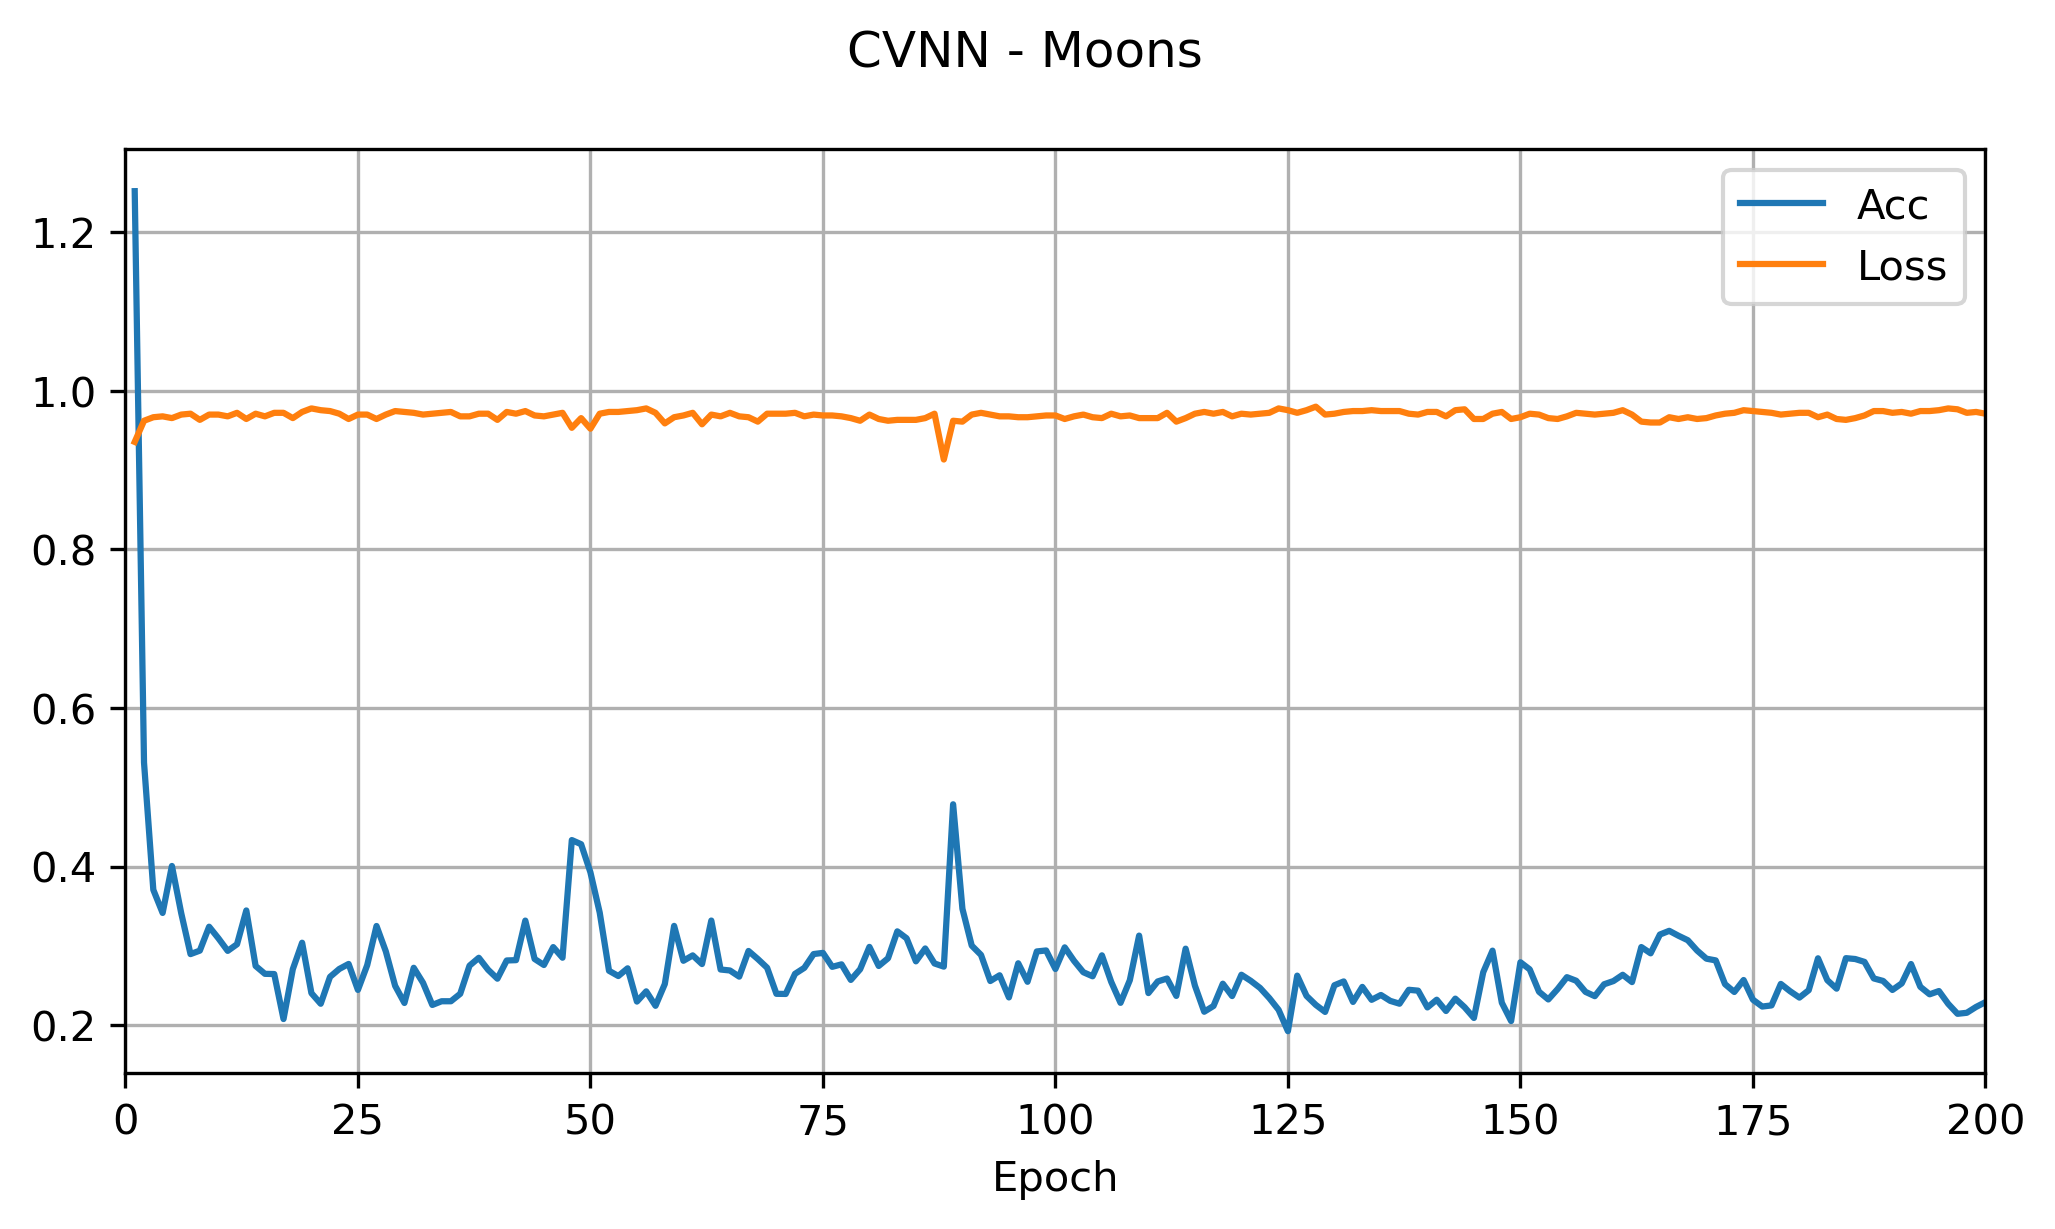

In [ ]:
# | echo: false
plot_loss("CVNN - Moons", losses, scores)

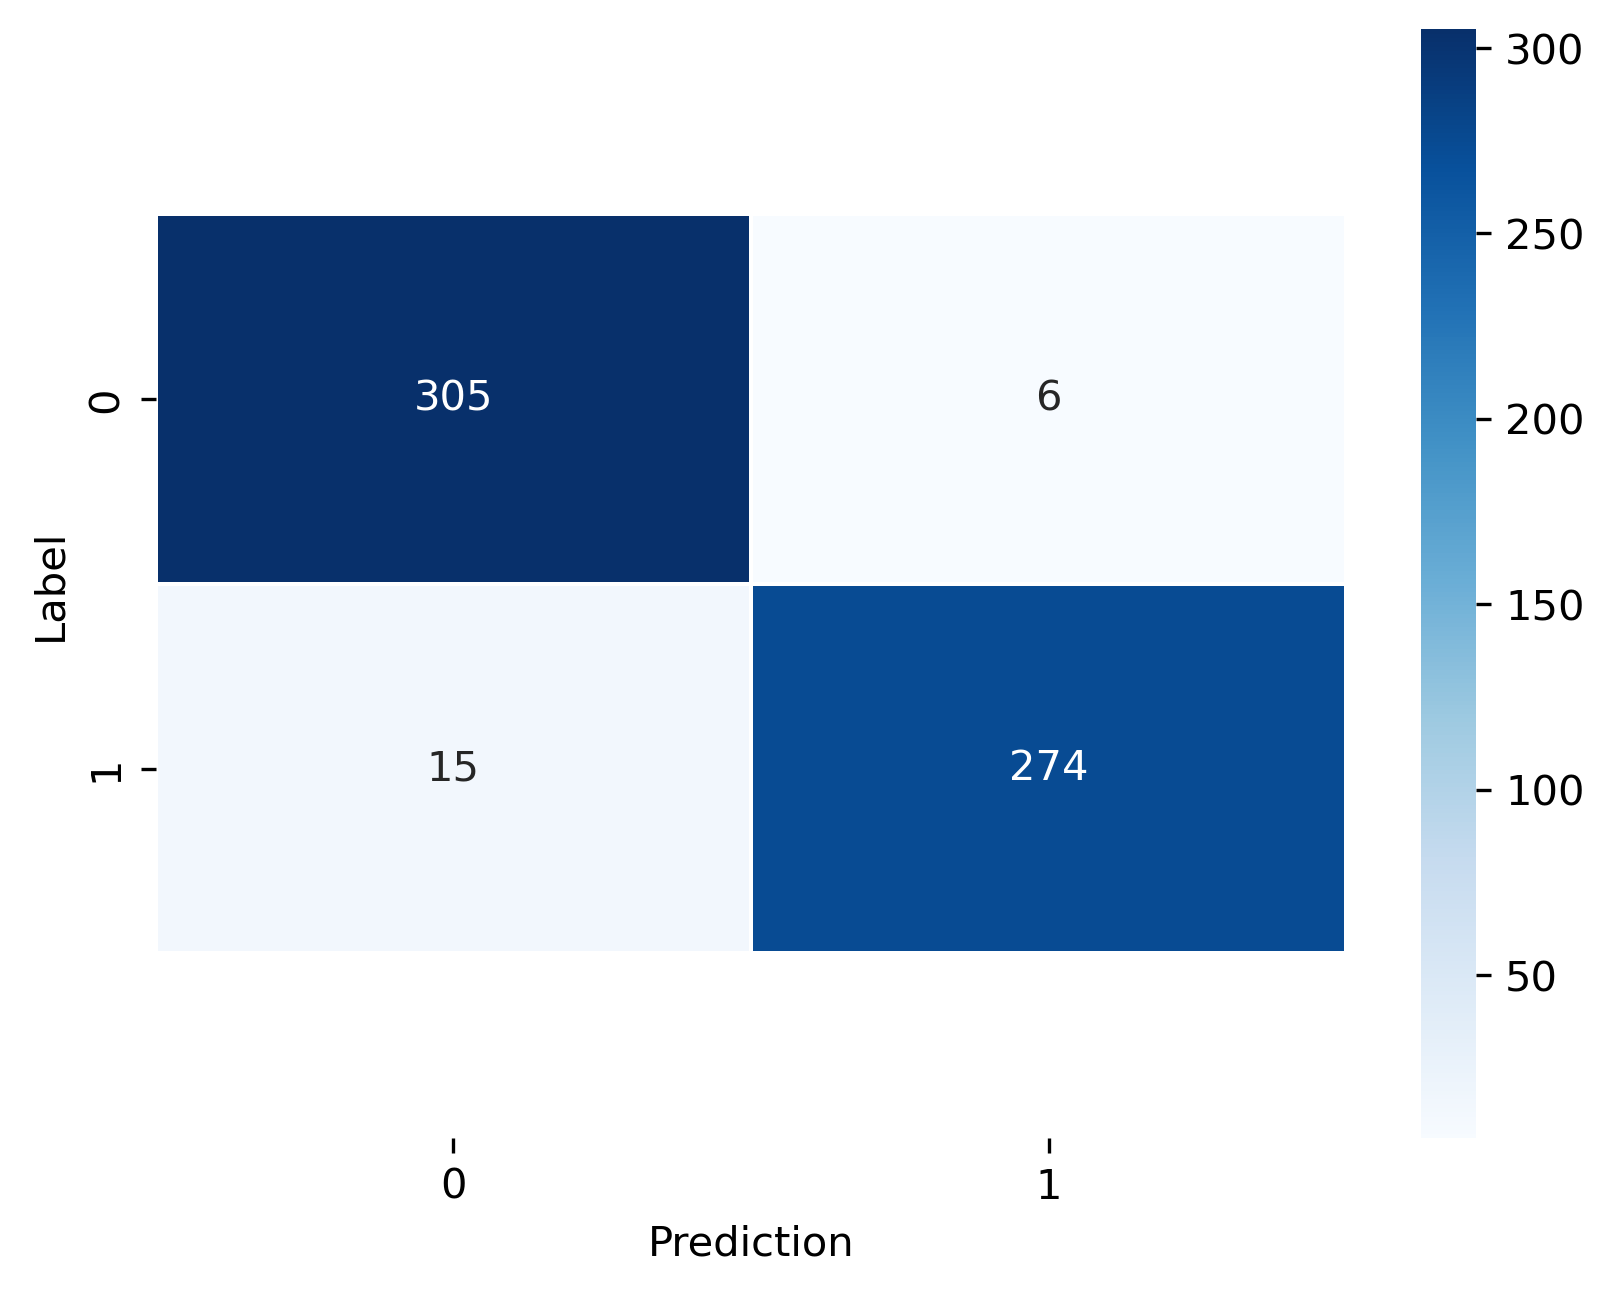

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       320
         1.0       0.95      0.98      0.96       280

    accuracy                           0.96       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.96      0.97       600



In [ ]:
# | echo: false
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred.detach().numpy())

ax = sns.heatmap(conf_mat, annot=True, fmt="g", linewidths=0.5, cmap=plt.cm.Blues)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Prediction")
plt.ylabel("Label")
# ax.figure.savefig('Dataset c3 - Model 48 - 1 - 3.png', dpi=300)
plt.show()

print(classification_report(y_pred.detach().numpy(), y_test))